# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: Dewi Sri Rahayu**
- **Email: dewisrirahayu715@gmail.com**
- **ID Dicoding: dewisrirahayu_05**

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan)?
- Total penyewaan sepeda berdasarkan musim dan hari kerja ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pola penggunaan sepeda pada hari libur dibandingkan dengan hari kerja.
- Pengaruh cuaca terhadap penggunaan sepeda baik oleh pengguna casual maupun registered.


### Assessing Data

#### Menilai tabel day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
day_df.duplicated().sum()

0

#### Menilai tabel hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.duplicated().sum()

0

**Insight:**
- Di tabel day_df dan hour_day tidak terdapat missing value dan duplikasi data.Namun di kolom dteday saat ini memiliki tipe object, padahal ini tanggal, sehingga akan diubah ke format datetime

### Cleaning Data

#### Membersihkan data day_df

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Cek Nilai yang Tidak Valid / Inkonsisten

In [13]:
day_df['weathersit'].unique()

array([2, 1, 3])

#### Membersihkan data hour_df

##### Memperbaiki tipe data

In [14]:
day_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Cek nilai Unik di kolom weathersit biasanya merepresentasikan kondisi cuaca pada saat penyewaan sepeda

In [15]:
day_df['weathersit'].unique()

array([2, 1, 3])

**Insight:**
- Mengubah kolom dteday ke format datetime agar lebih mudah diproses.
- Cek nilai unik untuk memastikan nilai weathersit sesuai dengan yang diharapkan, dan ya tidak ada nilai di luar rentang antara 1-4.

## Exploratory Data Analysis (EDA)

### Explore dengan Visualisasi Distribusi Penyewaan Sepeda (cnt) untuk melihat seberapa banyak orang menyewa sepeda di berbagai kondisi.

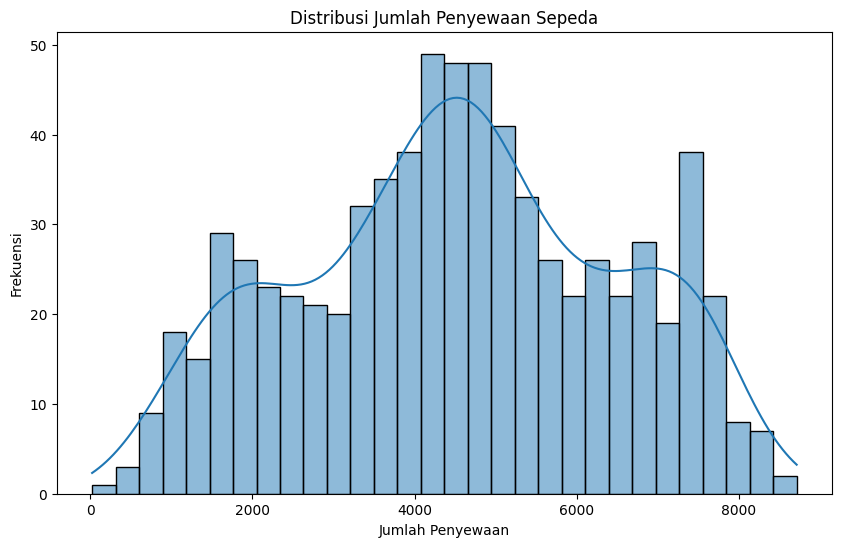

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Sumbu X adalah jumlah penyewaan sepeda (2000, 4000, 6000, dan seterusnya).
- Sumbu Y menunjukkan frekuensi atau berapa banyak hari dengan jumlah penyewaan sepeda tertentu terjadi.
- Jadi, bagian grafik di sekitar 4000-5000 terlihat lebih tinggi, menunjukkan bahwa jumlah penyewaan di rentang ini adalah yang paling sering terjadi.

### Explore dengan Analisis Berdasarkan Musim (season) untuk melihat sebaran penyewaan sepeda di setiap musim

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


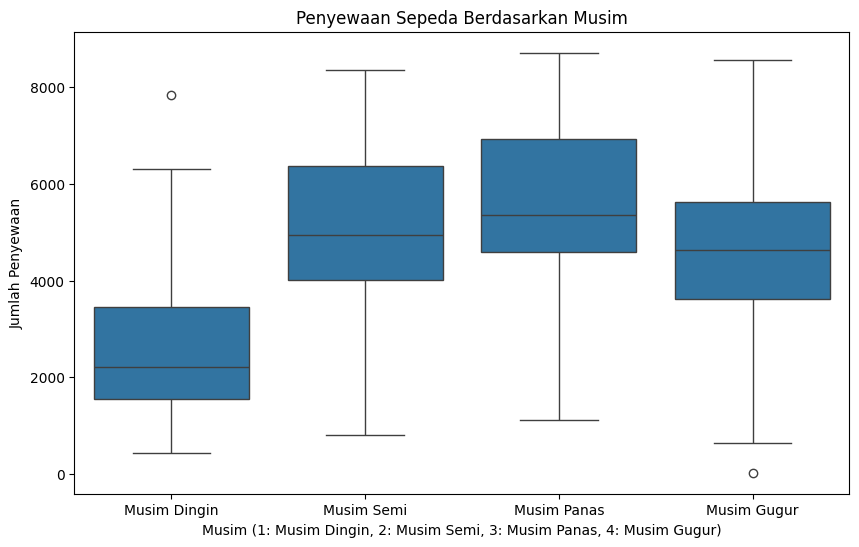

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Dingin, 2: Musim Semi, 3: Musim Panas, 4: Musim Gugur)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

**Insight:**
- Musim Semi dan Musim Panas memiliki penyewaan sepeda tertinggi secara keseluruhan. Rentang kuartil pertama hingga ketiga (kotak) berada di kisaran yang lebih tinggi, menunjukkan jumlah penyewaan lebih tinggi pada musim ini.
- Musim Dingin dan Musim Gugur memiliki penyewaan yang lebih rendah dibandingkan dengan musim lainnya. Median penyewaan sepeda pada musim ini lebih rendah, dan whiskers juga lebih pendek.
- Outliers (Titik di luar whiskers) di Musim Dingin dan Musim Gugur menunjukkan ada beberapa hari dengan penyewaan yang sangat tinggi atau sangat rendah dibandingkan dengan hari-hari lainnya di musim tersebut.
- Garis di dalam kotak adalah median (nilai tengah) jumlah penyewaan sepeda.
- Garis horizontal (whiskers): Garis vertikal di luar kotak yang menunjukkan sebaran data di luar 50% tersebut, dari data minimum hingga data maksimum (kecuali outlier).

### Explore dengan Analisis Berdasarkan HAri Kerja (workingday) untuk melihat perbandingan ini, kita bisa tahu apakah orang lebih cenderung menyewa sepeda ketika mereka bekerja atau saat mereka libur

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


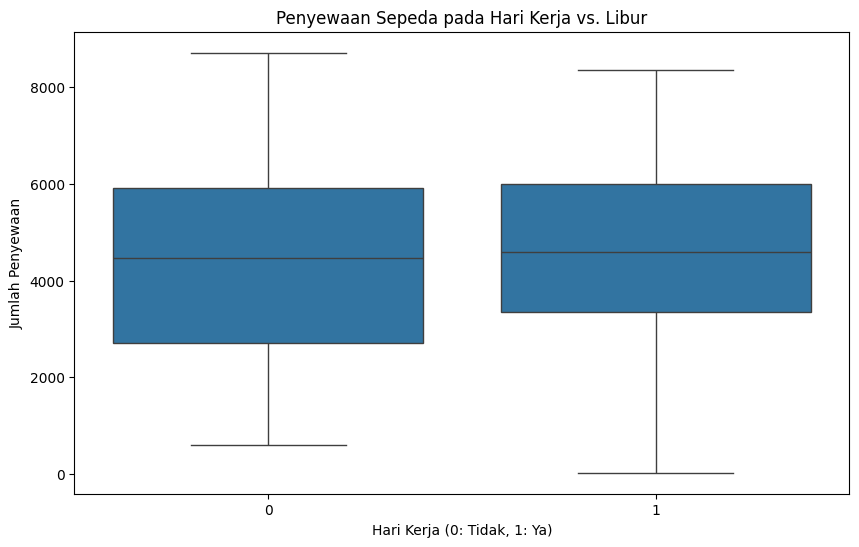

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda pada Hari Kerja vs. Libur')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**

Box plot ini menunjukkan bahwa hari kerja cenderung memiliki jumlah penyewaan yang lebih tinggi dan lebih bervariasi dibandingkan dengan hari libur, mencerminkan penggunaan sepeda yang lebih besar sebagai moda transportasi untuk komuter.

### Explore dengan Analisis Berdasarkan Hubungan antara Suhu dan Penyewaan (temp) untuk melihat apakah ada korelasi antara suhu yang lebih tinggi dengan lebih banyak penyewaan

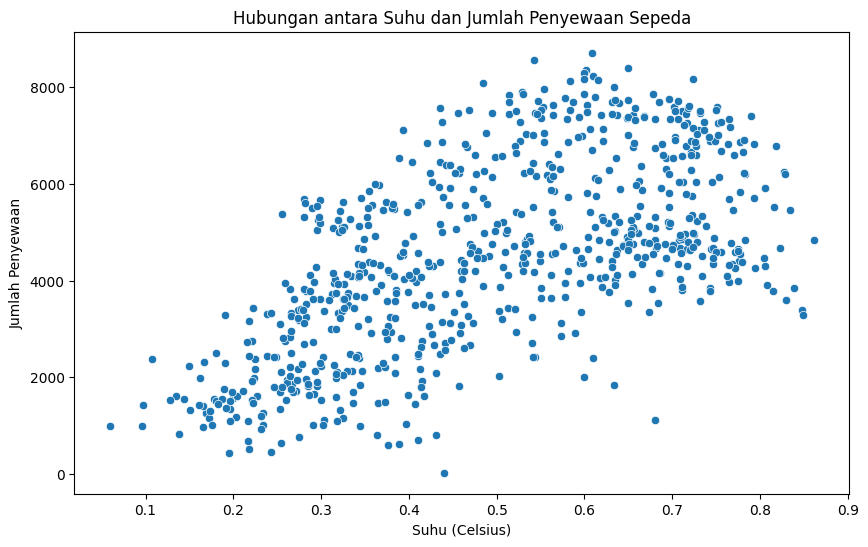

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**

ada hubungan positif antara suhu dan jumlah penyewaan sepeda, dengan suhu yang lebih hangat cenderung mendorong lebih banyak penyewaan, tetapi dengan kemungkinan penurunan pada suhu yang ekstrem.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan)?

#### Berdasarkan Jam

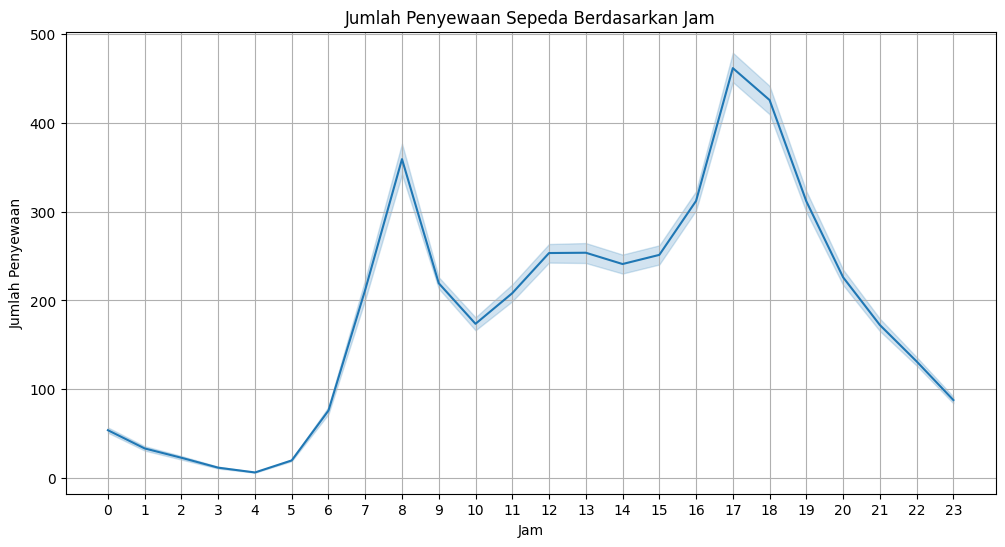

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 sampai 23
plt.grid()
plt.show()

**Insight**

- Puncak Penyewaan terjadi pada jam-jam komuter, yaitu sekitar pagi (jam 7-9) dan sore (jam 16-18). Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai moda transportasi untuk pergi dan pulang dari tempat kerja atau sekolah.
- Penurunan Penyewaan terjadi pada siang hari (sekitar jam 10-15) dan malam hari (setelah jam 20). Di jam-jam ini, penyewaan lebih sedikit karena orang-orang sudah berada di tempat tujuan atau aktivitas mereka menurun di malam hari.

#### Berdasarkan Hari

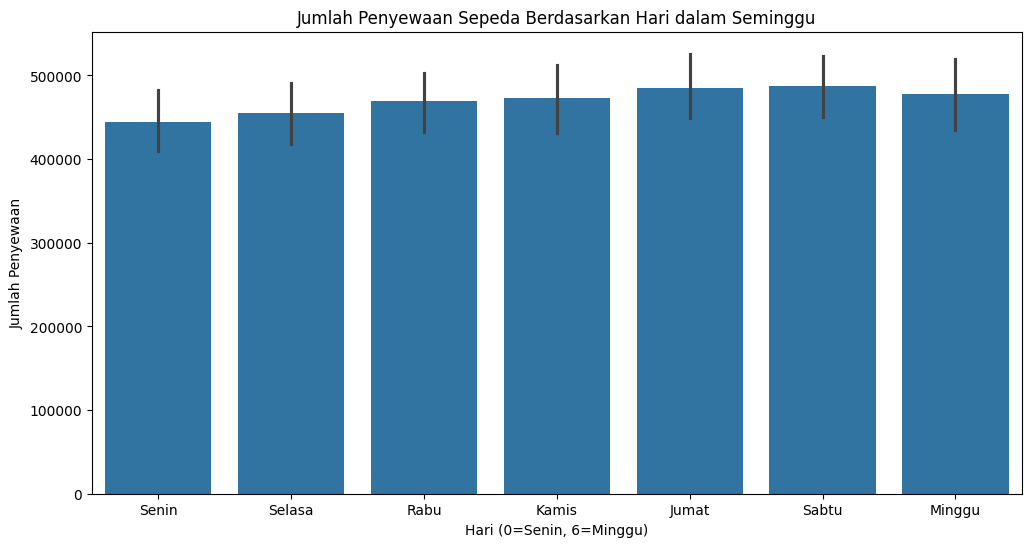

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day_df, x='weekday', y='cnt', estimator=sum)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight**

- Hari Kerja (Senin-Jumat), jumlah penyewaan sepeda cenderung stabil atau lebih tinggi pada hari-hari kerja, terutama dari Senin hingga Jumat. Ini mungkin menunjukkan penggunaan sepeda sebagai moda transportasi rutin.
- Akhir Pekan (Sabtu dan Minggu), Penyewaan sepeda di akhir pekan bisa menunjukkan pola yang berbeda. Jika terjadi peningkatan pada Sabtu dan Minggu, ini menunjukkan lebih banyak penyewaan untuk aktivitas rekreasi atau aktivitas santai.

#### Berdasarkan Bulan

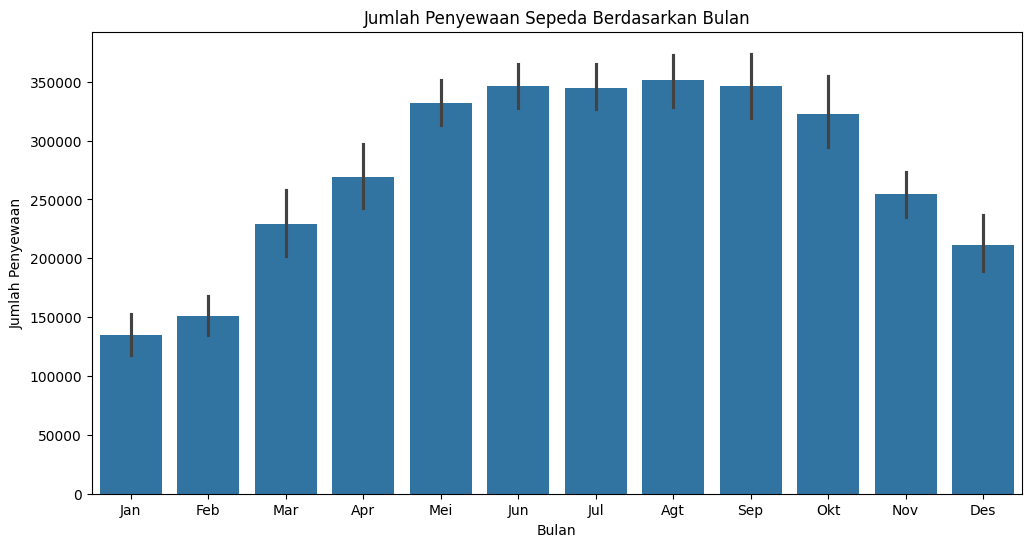

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day_df, x='mnth', y='cnt', estimator=sum)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

**Insight**

- Bulan-bulan dengan barplot yang lebih tinggi menunjukkan adanya peningkatan aktivitas penyewaan sepeda.bulan-bulan seperti Mei hingga Agustus (musim semi dan musim panas) memiliki penyewaan yang lebih tinggi.
- Bulan-bulan dengan barplot yang lebih pendek, seperti Januari atau Februari (musim dingin), menunjukkan jumlah penyewaan yang lebih sedikit, kemungkinan besar karena cuaca yang lebih dingin.

### Pertanyaan 2: Total penyewaan sepeda berdasarkan musim dan hari kerja ?

#### Analisis total penyewaan sepeda berdasarkan musim

In [23]:
# Menghitung total penyewaan berdasarkan musim
season_counts = day_df.groupby('season')['cnt'].sum().reset_index()
season_counts = season_counts.sort_values(by='cnt', ascending=False)

print("Total penyewaan berdasarkan musim:")
print(season_counts)

Total penyewaan berdasarkan musim:
   season      cnt
2       3  1061129
1       2   918589
3       4   841613
0       1   471348


**Insight**

- Musim Panas (season 3): Jumlah penyewaan sepeda tertinggi, yaitu 1.061.129.
- Musim Semi (season 2): Penyewaan sepeda mencapai 918.589, lebih rendah dari Musim Panas tetapi masih signifikan.
- Musim Gugur (season 4): Penyewaan sepeda sebesar 841.613, sedikit lebih rendah dari Musim Semi.
- Musim Dingin (season 1): Penyewaan sepeda terendah dengan 471.348 penyewaan.

#### Analisis total penyewaan sepeda berdasarkan hari kerja

In [24]:
# Menghitung total penyewaan berdasarkan hari kerja
workingday_counts = day_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_counts = workingday_counts.sort_values(by='cnt', ascending=False)

# Ubah nilai 0 dan 1 menjadi keterangan 'Tidak' dan 'Ya'
workingday_counts['workingday'] = workingday_counts['workingday'].replace({0: 'Tidak', 1: 'Ya'})

print("\nTotal penyewaan berdasarkan hari kerja:")
print(workingday_counts)


Total penyewaan berdasarkan hari kerja:
  workingday      cnt
1         Ya  2292410
0      Tidak  1000269


**Insight**

- Pada hari kerja ("Ya"), jumlah total penyewaan sepeda mencapai 2.292.410.
- Pada hari non-kerja atau hari libur ("Tidak"), total penyewaan jauh lebih rendah, hanya 1.000.269.

Jumlah penyewaan sepeda pada hari kerja hampir dua kali lipat lebih tinggi dibandingkan hari libur. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai moda transportasi di hari kerja

#### Visualisasi

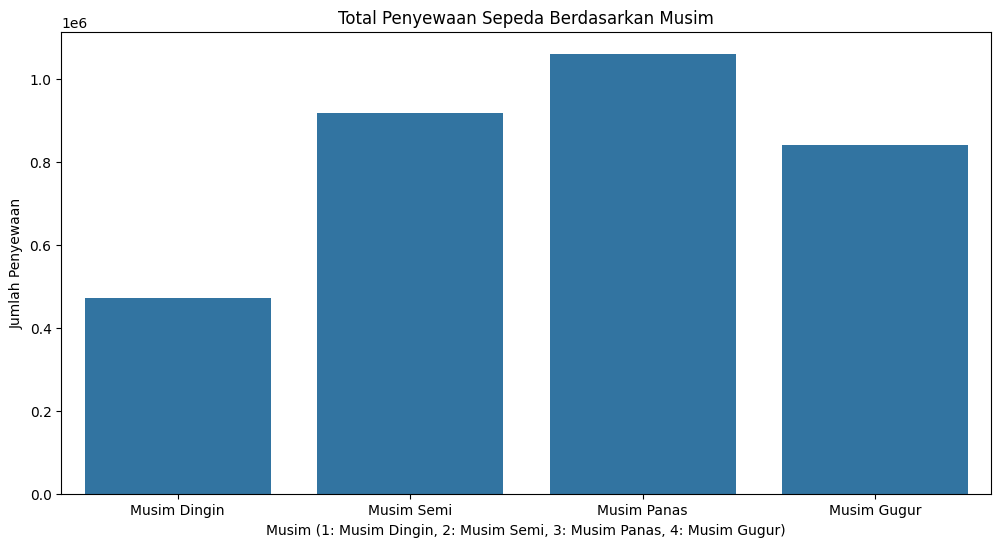

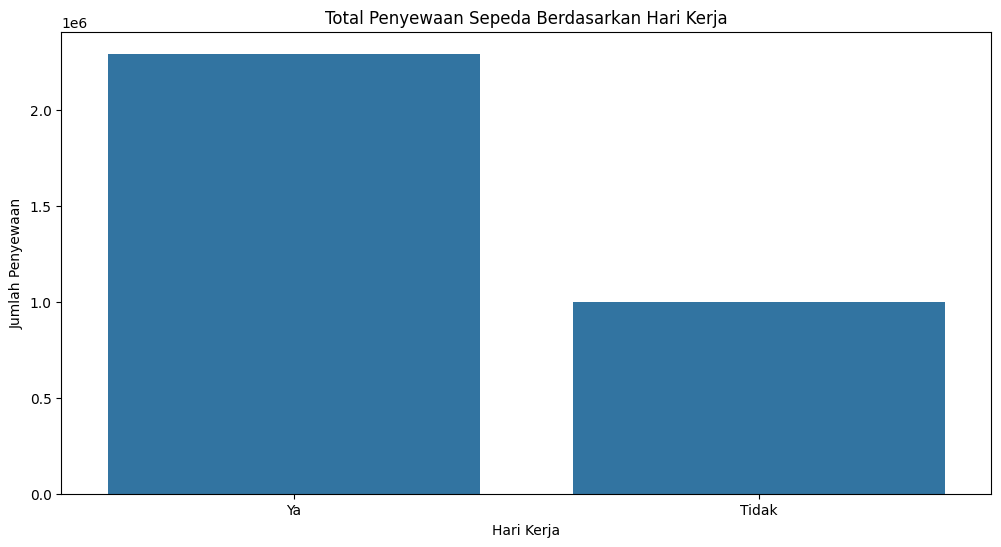

In [25]:
# Visualisasi total penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
sns.barplot(data=season_counts, x='season', y='cnt')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Dingin, 2: Musim Semi, 3: Musim Panas, 4: Musim Gugur)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

# Visualisasi total penyewaan berdasarkan hari kerja
plt.figure(figsize=(12, 6))
sns.barplot(data=workingday_counts, x='workingday', y='cnt')
plt.title('Total Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**

Berdasarkan analisis penyewaan sepeda. Penyewaan sepeda paling tinggi selama musim semi dan panas.
Pengguna cenderung menyewa lebih banyak pada hari kerja dibandingkan hari libur.

## Conclusion

**Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan)?**

Analisis menunjukkan bahwa waktu puncak peminjaman sepeda terjadi pada jam sibuk pagi (07.00-09.00) dan sore (16.00-18.00) pada hari kerja. Informasi ini dapat digunakan untuk merencanakan pengadaan sepeda dan penempatan stasiun peminjaman di area yang padat pengguna.

Jumlah penyewaan sepeda cenderung stabil atau lebih tinggi pada hari-hari kerja, terutama dari Senin hingga Jumat. Ini mungkin menunjukkan penggunaan sepeda sebagai moda transportasi rutin.
Penyewaan sepeda di akhir pekan bisa menunjukkan pola yang berbeda. Jika terjadi peningkatan pada Sabtu dan Minggu, ini menunjukkan lebih banyak penyewaan untuk aktivitas rekreasi atau aktivitas santai.

Bulan-bulan dengan barplot yang lebih tinggi menunjukkan adanya peningkatan aktivitas penyewaan sepeda.bulan-bulan seperti Mei hingga Agustus (musim semi dan musim panas) memiliki penyewaan yang lebih tinggi. Sedangkan,
Bulan-bulan dengan barplot yang lebih pendek, seperti Januari atau Februari (musim dingin), menunjukkan jumlah penyewaan yang lebih sedikit, kemungkinan besar karena cuaca yang lebih dingin.


**Pertanyaan 2: Total penyewaan sepeda berdasarkan musim dan hari kerja ?**

Berdasarkan analisis penyewaan sepeda. Penyewaan sepeda paling tinggi selama musim semi dan panas.
Pengguna cenderung menyewa lebih banyak pada hari kerja dibandingkan hari libur.